In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Optional: Set plotting style
sns.set(style='whitegrid')

In [25]:
# Load the adjusted party-community table
party_community_df = pd.read_csv('../data/party_community_table_adjusted.csv')

# Load the results summary
results_summary_df = pd.read_csv('../data/results_summary.csv')

# Load the detailed results
detailed_results_df = pd.read_csv('../data/detailed_results.csv')

In [26]:
# Preview the party-community DataFrame
print("Party-Community Data:")
display(party_community_df.head())

# Preview the results summary DataFrame
print("\nResults Summary Data:")
display(results_summary_df.head())

# Preview the detailed results DataFrame
print("\nDetailed Results Data:")
display(detailed_results_df.head())

Party-Community Data:


,party,2003_0,2003_1,2003_2,2004_0,2004_1,2004_2,2005_0,2005_1,2005_2,...,2020_2,2021_0,2021_1,2021_2,2022_0,2022_1,2022_2,2023_0,2023_1,2023_2
0,PT,9.0,7.0,4.0,60.0,1.0,0,88.0,2.0,0,...,0,58.0,0.0,0,60.0,0.0,0.0,69.0,0.0,0.0
1,PSDB,6.0,1.0,1.0,3.0,33.0,0,6.0,54.0,0,...,0,21.0,22.0,0,12.0,28.0,0.0,7.0,12.0,1.0
2,PP,2.0,0.0,0.0,17.0,17.0,0,32.0,17.0,0,...,0,0.0,26.0,0,1.0,28.0,0.0,10.0,28.0,1.0
3,PSB,1.0,2.0,1.0,14.0,6.0,0,22.0,5.0,0,...,0,30.0,6.0,0,26.0,12.0,0.0,18.0,5.0,1.0
4,PFL,5.0,10.0,5.0,3.0,44.0,0,10.0,56.0,0,...,0,1.0,6.0,0,2.0,7.0,0.0,4.0,1.0,0.0



Results Summary Data:


,Year,Optimal Pruning Percentage (%),Number of Communities,Modularity,Polarization Lower Bound (%),Polarization Upper Bound (%)
0,2006,46,3,0.396431,40,60
1,2005,42,2,0.350524,30,70
2,2004,26,2,0.488004,40,60
3,2003,2,3,0.560594,40,60
4,2010,44,3,0.229066,30,70



Detailed Results Data:


,Year,Polarization Lower Bound (%),Polarization Upper Bound (%),Pruning Percentage (%),Number of Communities,Modularity
0,2006,0,100,0,9,0.017445
1,2006,0,100,2,9,0.017470
2,2006,0,100,4,11,0.017538
3,2006,0,100,6,4,0.018024
4,2006,0,100,8,4,0.018604


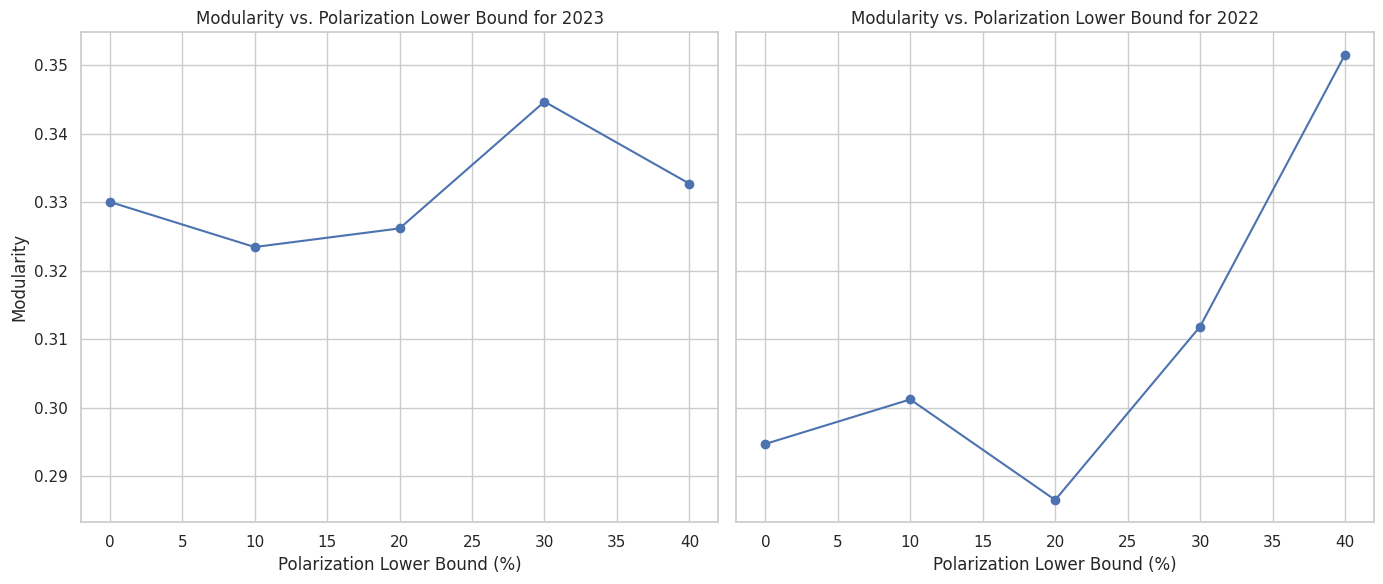

In [29]:
# Filter detailed_results_df for the years 2023 and 2022
years = [2023, 2022]
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

for idx, year in enumerate(years):
    year_data = detailed_results_df[detailed_results_df['Year'] == year]
    
    # Calculate average modularity for each polarization lower bound
    modularity_by_polarization = year_data.groupby('Polarization Lower Bound (%)')['Modularity'].mean().reset_index()
    
    # Plotting
    axes[idx].plot(modularity_by_polarization['Polarization Lower Bound (%)'], modularity_by_polarization['Modularity'], marker='o')
    axes[idx].set_title(f'Modularity vs. Polarization Lower Bound for {year}')
    axes[idx].set_xlabel('Polarization Lower Bound (%)')
    if idx == 0:
        axes[idx].set_ylabel('Modularity')
    axes[idx].grid(True)

plt.tight_layout()
plt.show()

In [30]:
results_summary_df


,Year,Optimal Pruning Percentage (%),Number of Communities,Modularity,Polarization Lower Bound (%),Polarization Upper Bound (%)
3,2003,2,3,0.560594,40,60
2,2004,26,2,0.488004,40,60
1,2005,42,2,0.350524,30,70
0,2006,46,3,0.396431,40,60
5,2007,38,2,0.386722,40,60
7,2008,40,3,0.364656,40,60
6,2009,42,3,0.294934,40,60
4,2010,44,3,0.229066,30,70
8,2011,42,3,0.339670,40,60
11,2012,42,3,0.316174,40,60


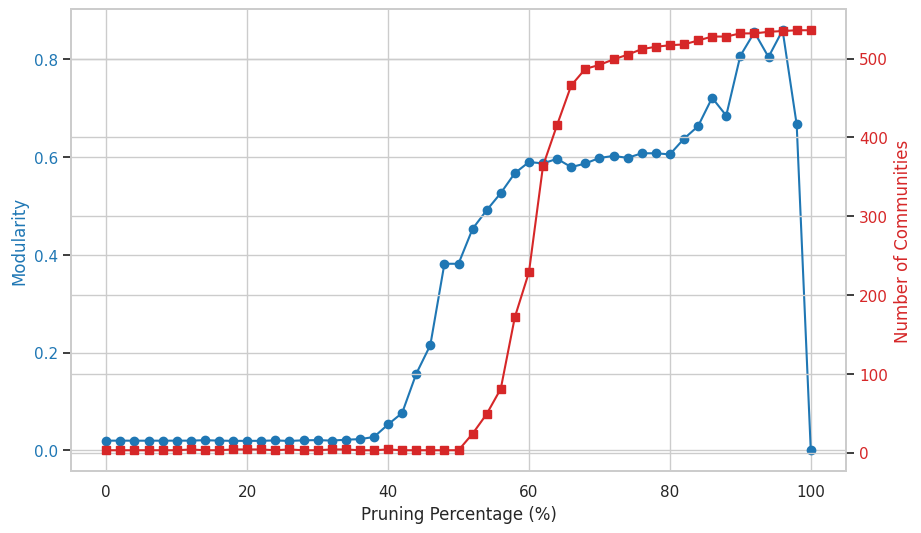

In [31]:
# Filter data for the optimal polarization bounds
year = 2023
optimal_polarization = results_summary_df[results_summary_df['Year'] == year]
lower_bound = optimal_polarization['Polarization Lower Bound (%)'].values[0]
upper_bound = optimal_polarization['Polarization Upper Bound (%)'].values[0]

# Filter detailed_results_df for the optimal polarization bounds
filtered_data = detailed_results_df[
    (detailed_results_df['Year'] == year) &
    (detailed_results_df['Polarization Lower Bound (%)'] == lower_bound) &
    (detailed_results_df['Polarization Upper Bound (%)'] == upper_bound)
]

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Pruning Percentage (%)')
ax1.set_ylabel('Modularity', color=color)
ax1.plot(filtered_data['Pruning Percentage (%)'], filtered_data['Modularity'], color=color, marker='o', label='Modularity')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('Number of Communities', color=color)
ax2.plot(filtered_data['Pruning Percentage (%)'], filtered_data['Number of Communities'], color=color, marker='s', label='Number of Communities')
ax2.tick_params(axis='y', labelcolor=color)

plt.show()


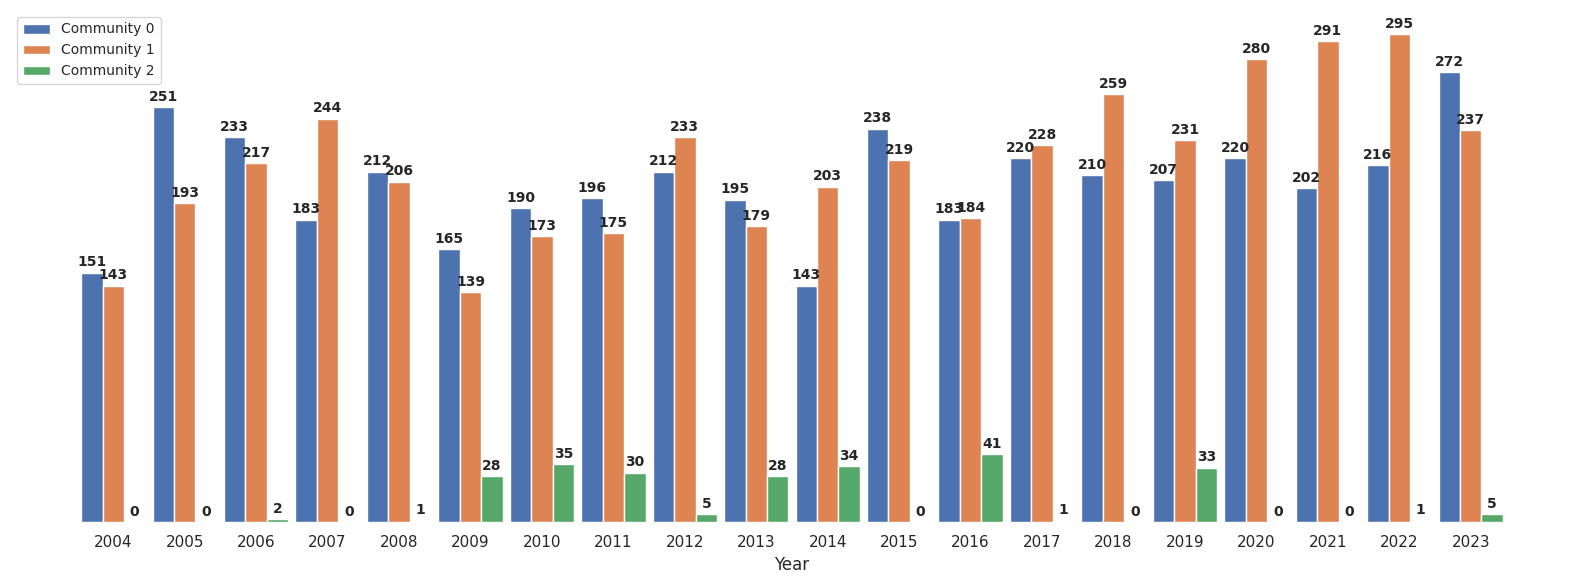

In [32]:
# Prepare data for plotting
years = sorted(party_community_df.columns[1:].str.extract('(\d{4})_', expand=False).unique())
communities = [0, 1, 2]

# Filter years between 2004 and 2023
years = [year for year in years if 2004 <= int(year) <= 2023]

# Initialize data structure
members_per_community = {year: {community: 0 for community in communities} for year in years}

# Aggregate number of members per community for each year
for year in years:
    for community in communities:
        column_name = f"{year}_{community}"
        if column_name in party_community_df.columns:
            members_per_community[year][community] = party_community_df[column_name].sum()

# Convert to DataFrame for plotting
members_df = pd.DataFrame.from_dict(members_per_community, orient='index').reset_index()
members_df.rename(columns={'index': 'Year'}, inplace=True)
members_df['Year'] = members_df['Year'].astype(int)
members_df.sort_values('Year', inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(16, 6))
width = 0.9  # Width of each bar
spacing_factor = 3  # Increase space between years

x = np.arange(len(members_df['Year'])) * spacing_factor  # Increase space between groups of bars

# Plot bars and add rounded values on top of each bar in bold with adjusted position
for idx, community in enumerate(communities):
    bars = ax.bar(x + idx * width, members_df[community], width, label=f'Community {community}')
    for bar in bars:
        height = round(bar.get_height())  # Round to nearest integer
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # Position horizontally at the center of the bar
            height + 2,                        # Position vertically above the bar with slight offset
            f'{height}',                       # Display the value
            ha='center', va='bottom', fontsize=10, fontweight='bold'  # Center alignment, font size, and bold
        )

# Customize the plot
ax.set_xlabel('Year')
ax.set_xticks(x + width)  # Adjust x-ticks to match the new spacing
ax.set_xticklabels(members_df['Year'])
ax.legend(fontsize=10)  # Reduce the font size of the legend

# Remove background lines and Y-axis label
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.yaxis.set_visible(False)

# Remove vertical grid lines
ax.grid(False)

plt.tight_layout()
plt.show()



Top 5 partidos na Comunidade 0 em 2023:
     party  Number of Deputies
2820    PT                69.0
2830   PSD                18.0
2822    PP                10.0
2821  PSDB                 7.0
2826    PL                 4.0

Top 5 partidos na Comunidade 1 em 2023:
     party  Number of Deputies
2873    PL                57.0
2869    PP                28.0
2877   PSD                13.0
2868  PSDB                12.0
2867    PT                 0.0

Top 5 partidos na Comunidade 2 em 2023:
     party  Number of Deputies
2915  PSDB                 1.0
2916    PP                 1.0
2914    PT                 0.0
2920    PL                 0.0
2924   PSD                 0.0



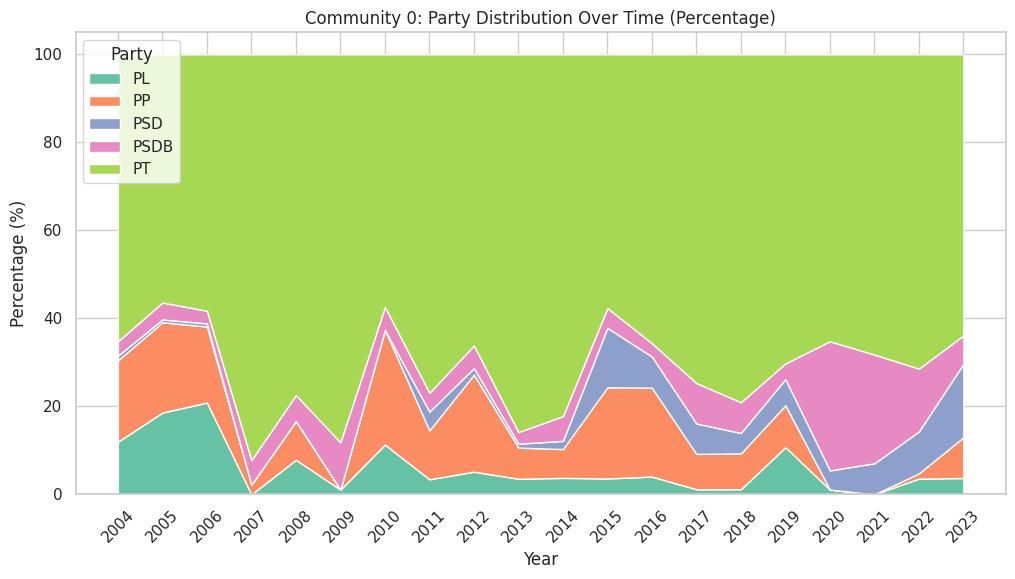

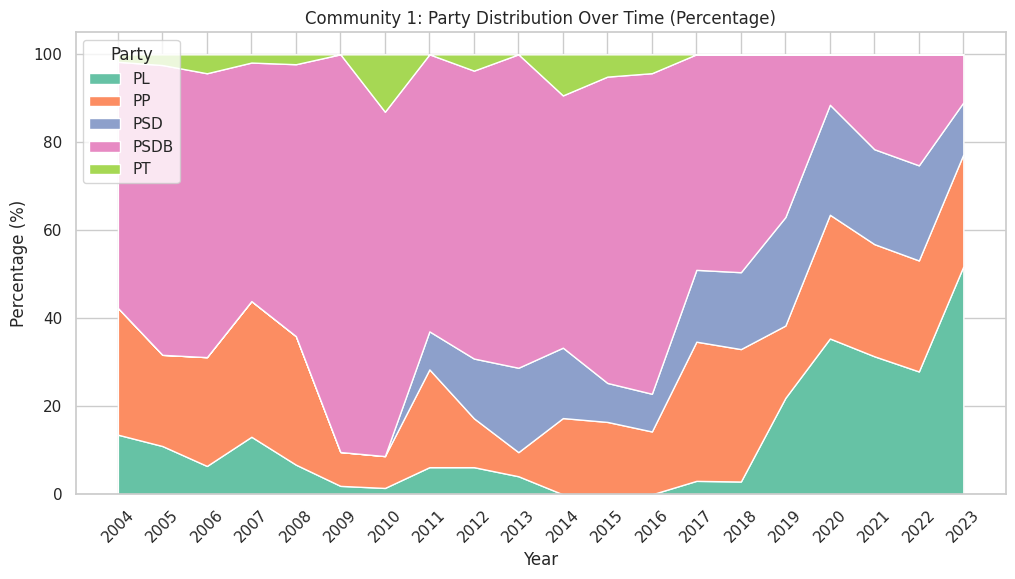

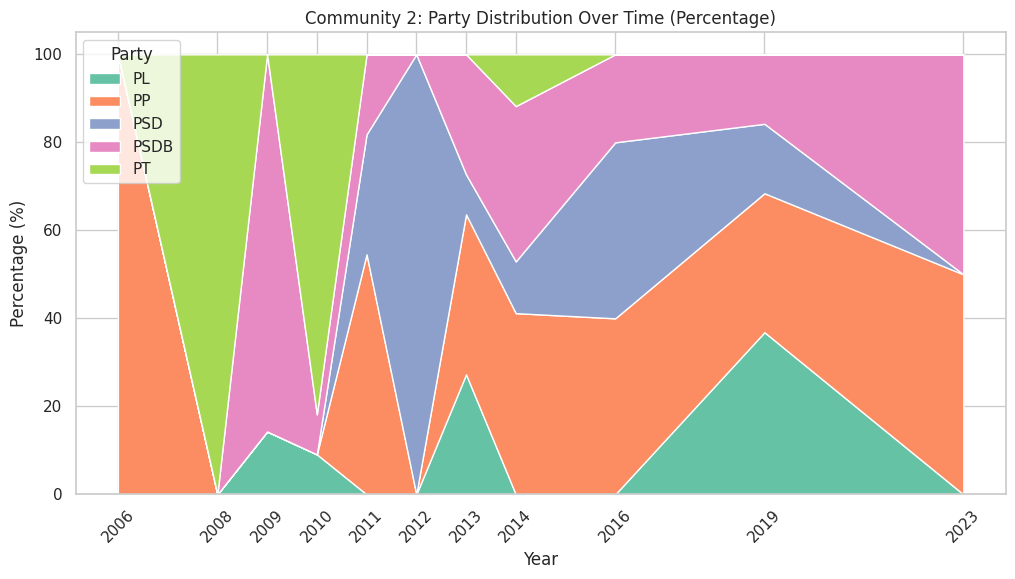

In [42]:
# Prepare data (usando o mesmo código de filtragem e cálculo de percentuais)
melted_df = pd.melt(party_community_df, id_vars=['party'], var_name='Year_Community', value_name='Number of Deputies')
melted_df[['Year', 'Community']] = melted_df['Year_Community'].str.split('_', expand=True)
melted_df['Year'] = melted_df['Year'].astype(int)
melted_df['Community'] = melted_df['Community'].astype(int)

# Filter for major parties and years 2004 to 2023
major_parties = ['PT', 'PSDB', 'PP', 'PL', 'PSD']
melted_df = melted_df[melted_df['party'].isin(major_parties)]
melted_df = melted_df[(melted_df['Year'] >= 2004) & (melted_df['Year'] <= 2023)]

# Calculate total deputies per community and year
total_deputies = melted_df.groupby(['Year', 'Community'])['Number of Deputies'].transform('sum')
melted_df['Percentage of Deputies'] = (melted_df['Number of Deputies'] / total_deputies * 100)

# Identificar os 5 partidos com mais deputados em cada comunidade no último ano (2023)
top_parties_last_year = {}
for community in [0, 1, 2]:
    last_year_df = melted_df[(melted_df['Community'] == community) & (melted_df['Year'] == 2023)]
    top_parties = last_year_df.nlargest(5, 'Number of Deputies')[['party', 'Number of Deputies']]
    top_parties_last_year[community] = top_parties
    print(f"Top 5 partidos na Comunidade {community} em 2023:")
    print(top_parties)
    print()

# Criação do gráfico de área empilhada
communities = [0, 1, 2]
colors = sns.color_palette("Set2", len(major_parties))  # Usar paleta de cores mais profissional

for community in communities:
    community_df = melted_df[melted_df['Community'] == community]
    
    # Pivot to get data in a format suitable for a stacked area plot
    area_data = community_df.pivot_table(index='Year', columns='party', values='Percentage of Deputies', fill_value=0)
    
    # Plotting
    plt.figure(figsize=(12, 6))
    plt.stackplot(area_data.index, area_data.T, labels=area_data.columns, colors=colors)
    plt.title(f'Community {community}: Party Distribution Over Time (Percentage)')
    plt.xlabel('Year')
    plt.ylabel('Percentage (%)')
    plt.legend(loc='upper left', title='Party')
    
    # Ajuste para mostrar apenas anos inteiros no eixo X
    plt.xticks(area_data.index, [str(year) for year in area_data.index], rotation=45)
    
    plt.show()

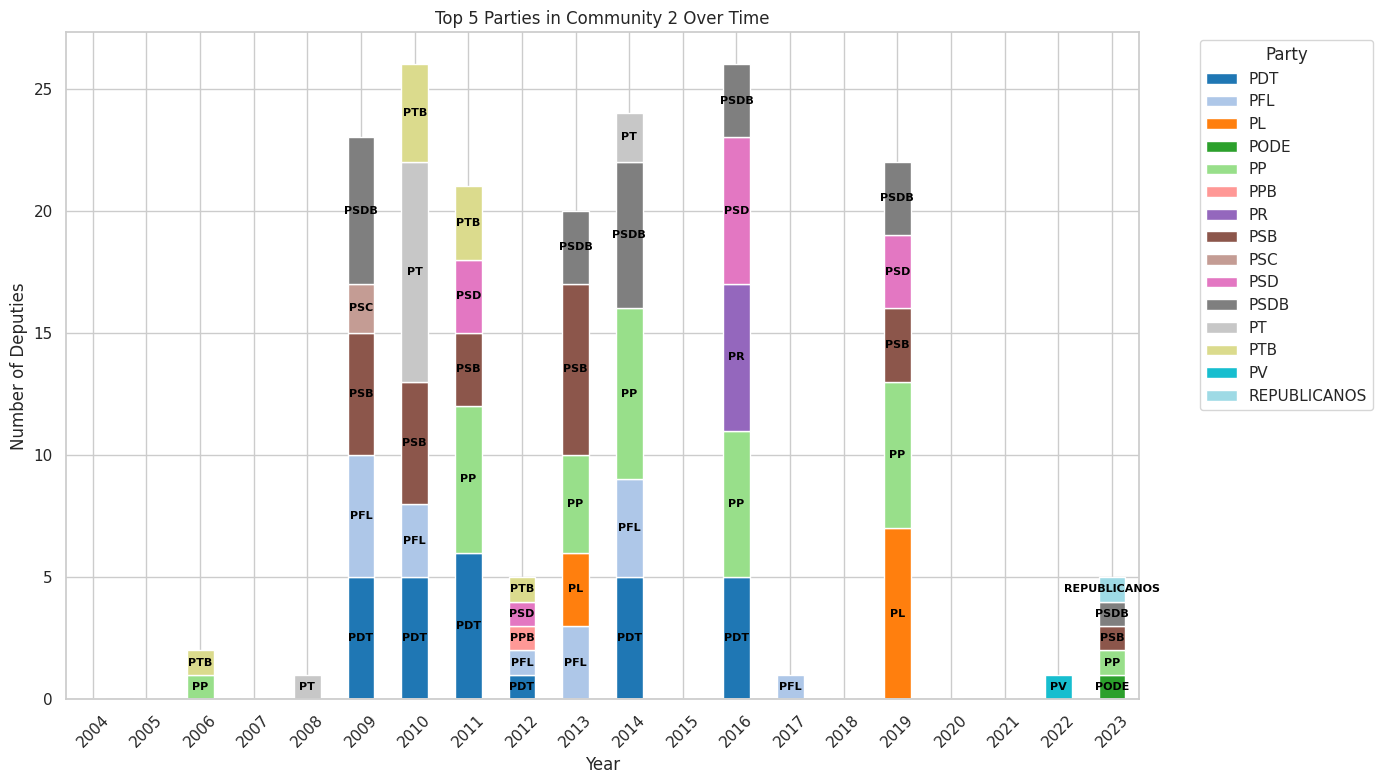

In [48]:
# Prepare data (usando o mesmo código de filtragem e cálculo de percentuais)
melted_df = pd.melt(party_community_df, id_vars=['party'], var_name='Year_Community', value_name='Number of Deputies')
melted_df[['Year', 'Community']] = melted_df['Year_Community'].str.split('_', expand=True)
melted_df['Year'] = melted_df['Year'].astype(int)
melted_df['Community'] = melted_df['Community'].astype(int)

# Filtrar para a Comunidade 2 e anos entre 2004 e 2023
community_2_df = melted_df[(melted_df['Community'] == 2) & (melted_df['Year'] >= 2004) & (melted_df['Year'] <= 2023)]

# Identificar os Top 5 partidos em cada ano para a Comunidade 2
top_parties_each_year = []
for year in sorted(community_2_df['Year'].unique()):
    year_df = community_2_df[community_2_df['Year'] == year]
    top_parties = year_df.nlargest(5, 'Number of Deputies')
    top_parties_each_year.append(top_parties)

# Concatenar todos os Top 5 partidos de cada ano em um único DataFrame
top_parties_community_2 = pd.concat(top_parties_each_year)

# Pivotar para formato adequado para gráfico de barras empilhadas
stacked_data = top_parties_community_2.pivot_table(index='Year', columns='party', values='Number of Deputies', fill_value=0)

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))
bars = stacked_data.plot(kind='bar', stacked=True, colormap="tab20", ax=ax)  # Colormap profissional

# Adicionar rótulos dos partidos dentro das caixas
for i, container in enumerate(ax.containers):
    # Obter o nome do partido correspondente ao contêiner
    party_label = stacked_data.columns[i]
    for bar in container:
        width = bar.get_width()
        height = bar.get_height()
        x = bar.get_x() + width / 2
        y = bar.get_y() + height / 2
        
        if height > 0:  # Adicionar rótulo apenas se a altura for maior que 0
            # Condição para rotacionar apenas o rótulo "Republicanos" em 2023
            rotation = 90 if party_label == "REPUBLICANOS" and int(bar.get_x()) == 2023 - 2004 else 0
            ax.text(x, y, party_label, ha='center', va='center', color='black', fontsize=8, fontweight='bold', rotation=rotation)

# Configurações adicionais do gráfico
plt.title('Top 5 Parties in Community 2 Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Deputies')
plt.legend(title='Party', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()